In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
import sys
from tqdm.auto import tqdm
import pandas as pd
import networkx as nx
import numpy as np

In [3]:
project_root = os.path.abspath(
    os.path.join("C:/Users/jllgo/OneDrive/Documentos/UFMG/MSc & MSI 2/MatchSegmentation")
)
if project_root not in sys.path:
    sys.path.append(project_root)

In [5]:
from src.pass_networks.process_intervals import load_graphs
from src.pass_networks.pass_network import calculate_metrics 
from src.pass_networks.custom_metrics import calculate_average_path_legth_target
from src.pass_networks.custom_metrics import calculate_wasserstein_distance
from src.pass_networks.custom_metrics import calculate_modularity
from src.pass_networks.custom_metrics import calculate_graph_distance_stream

# Get Graphs

In [6]:
PROCESSED_DATA_PATH = "../data/processed/PL-22-23"
CSV_DATA_PATH = "../data/csv"

In [7]:
games = os.listdir(PROCESSED_DATA_PATH)
game_ids = [game.split('.')[0] for game in games]
print(f"Games to process: {len(game_ids)}")

Games to process: 95


In [8]:
matches = []

for match_id in tqdm(game_ids, desc="Loading Graphs", total=len(game_ids)):
    match_graphs = load_graphs(match_id, PROCESSED_DATA_PATH)
    matches += match_graphs

Loading Graphs:   0%|          | 0/95 [00:00<?, ?it/s]

In [9]:
matches_df = pd.DataFrame(matches)
matches_df

,match_id,interval_id,team_id,graph
0,4436,1.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)"
1,4436,1.0,7,"(-1, 17, 13, 15, 11, 9, 3, 10, 16, 28, 6, 22)"
2,4436,2.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)"
3,4436,2.0,7,"(-1, 17, 13, 15, 11, 9, 3, 10, 16, 28, 6, 22)"
4,4436,3.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)"
...,...,...,...,...
9361,4576,48.0,12,"(-1, 1, 2, 20, 10, 9, 18, 36, 7, 14, 6, 12)"
9362,4576,49.0,3,"(-1, 1, 5, 4, 6, 7, 9, 2, 41, 8, 44, 18)"
9363,4576,49.0,12,"(-1, 1, 2, 20, 10, 9, 18, 36, 7, 14, 6, 12)"
9364,4576,50.0,3,"(-1, 1, 5, 4, 6, 7, 9, 2, 41, 8, 44, 18)"


# Graph Stream

In [18]:
distance_metrics = {    
    "Wasserstein": calculate_wasserstein_distance
}

In [20]:
df_sorted = matches_df.sort_values(by=['match_id', 'team_id', 'interval_id']).reset_index(drop=True)
df_sorted.head()

,match_id,interval_id,team_id,graph,Density,Average Clustering,Betweenness Centrality,Average Betweenness Centrality,Closeness Centrality,Average Closeness Centrality,Averge Path Length
0,4436,1.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.106061,0.000000,"{-1: 0.0, 35: 0.14545454545454545, 9: 0.0, 34:...",0.131061,"{-1: 0.0, 35: 0.3232323232323232, 9: 0.1888111...",0.170396,inf
1,4436,2.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.075758,0.062500,"{-1: 0.0, 35: 0.09999999999999999, 9: 0.009090...",0.018939,"{-1: 0.2727272727272727, 35: 0.204545454545454...",0.112170,1.714286
2,4436,3.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.174242,0.242645,"{-1: 0.0, 35: 0.10454545454545452, 9: 0.081818...",0.091667,"{-1: 0.0, 35: 0.43315508021390375, 9: 0.409090...",0.296537,inf
3,4436,4.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.090909,0.058532,"{-1: 0.0, 35: 0.39999999999999997, 9: 0.127272...",0.125758,"{-1: 0.28321678321678323, 35: 0.34224598930481...",0.177494,2.600000
4,4436,5.0,2,"(-1, 35, 9, 34, 11, 7, 1, 5, 8, 6, 12, 4)",0.121212,0.129299,"{-1: 0.0, 35: 0.13636363636363635, 9: 0.099999...",0.103788,"{-1: 0.27548209366391185, 35: 0.33471074380165...",0.241537,3.000000
...,...,...,...,...,...,...,...,...,...,...,...
9361,4576,46.0,12,"(-1, 1, 2, 20, 10, 9, 18, 36, 7, 14, 6, 12)",0.000000,0.000000,"{-1: 0.0, 1: 0.0, 2: 0.0, 20: 0.0, 10: 0.0, 9:...",0.000000,"{-1: 0.0, 1: 0.0, 2: 0.0, 20: 0.0, 10: 0.0, 9:...",0.000000,inf
9362,4576,47.0,12,"(-1, 1, 2, 20, 10, 9, 18, 36, 7, 14, 6, 12)",0.007576,0.000000,"{-1: 0.0, 1: 0.0, 2: 0.0, 20: 0.0, 10: 0.0, 9:...",0.000000,"{-1: 0.0, 1: 0.0, 2: 0.0, 20: 0.0, 10: 0.0, 9:...",0.007576,inf
9363,4576,48.0,12,"(-1, 1, 2, 20, 10, 9, 18, 36, 7, 14, 6, 12)",0.045455,0.000000,"{-1: 0.0, 1: 0.0, 2: 0.0, 20: 0.0, 10: 0.02727...",0.010606,"{-1: 0.0, 1: 0.0, 2: 0.0, 20: 0.0, 10: 0.13636...",0.066288,inf
9364,4576,49.0,12,"(-1, 1, 2, 20, 10, 9, 18, 36, 7, 14, 6, 12)",0.022727,0.000000,"{-1: 0.0, 1: 0.0, 2: 0.01818181818181818, 20: ...",0.003030,"{-1: 0.0, 1: 0.0, 2: 0.09090909090909091, 20: ...",0.029040,inf


In [21]:
# Lista para armazenar os resultados
distance_data = []

# Itera sobre os grupos de 'match_id' e 'team_id'
for (match_id, team_id), group in tqdm(df_sorted.groupby(['match_id', 'team_id']), desc="Calculating Distances", total=len(df_sorted.groupby(['match_id', 'team_id']))):
    # Ordena o grupo por 'interval_id'
    group = group.sort_values(by='interval_id').reset_index(drop=True)
    # Itera sobre os pares de grafos consecutivos
    for i in range(len(group) - 1):
        current_row = group.iloc[i]
        next_row = group.iloc[i + 1]
        # Verifica se os 'interval_id' são consecutivos
        distances = {'match_id': match_id, 'team_id': team_id, 'interval_id': current_row['interval_id']}
        G1 = current_row['graph']
        G2 = next_row['graph']
        # Calcula cada métrica de distância
        for metric_name, metric_fn in distance_metrics.items():
            distances[metric_name] = metric_fn(G1, G2)
        distance_data.append(distances)

# Cria o novo DataFrame com as métricas de distância
df_distances = pd.DataFrame(distance_data)
df_distances

Calculating Distances:   0%|          | 0/190 [00:00<?, ?it/s]

,match_id,team_id,interval_id,Wasserstein
0,4436,2,1.0,0.666667
1,4436,2,2.0,2.166667
2,4436,2,3.0,1.833333
3,4436,2,4.0,0.666667
4,4436,2,5.0,0.666667
...,...,...,...,...
9171,4576,12,45.0,1.166667
9172,4576,12,46.0,0.166667
9173,4576,12,47.0,0.833333
9174,4576,12,48.0,0.500000


# Optimization

In [24]:
from src.concept_drift.drift_points import detect_kswin_drift
import numpy as np

In [77]:
from src.concept_drift.syntethic_graphs import generate_synthetic_data
from src.concept_drift.syntethic_graphs import draw_synthetic_data
from src.concept_drift.optimization import optimize_drift_parameters

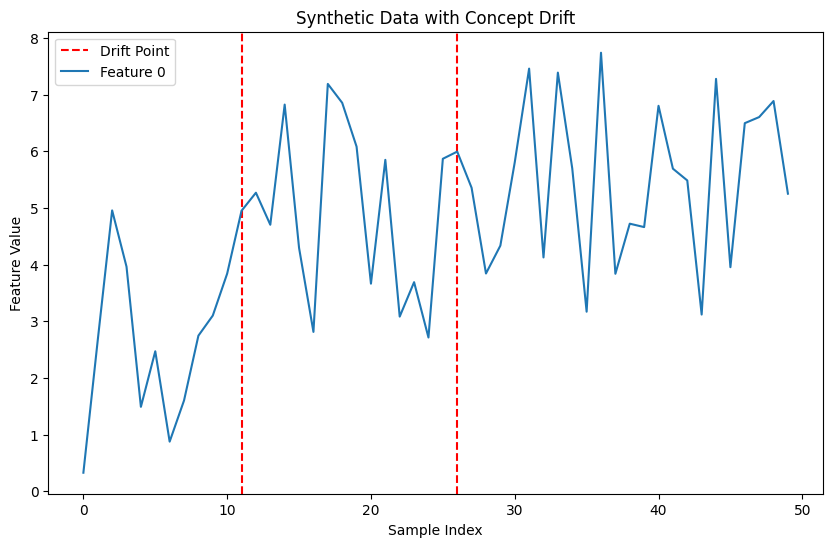

In [125]:
# Generate the dataset
synthetic_data, expected_drift_points = generate_synthetic_data(n_samples=50, n_drifts=2)
draw_synthetic_data(synthetic_data, expected_drift_points)

In [126]:
# KSWIN Parameter Grid
kswin_param_grid = {
    'a': [0.001, 0.005, 0.01, 0.05, 0.1],
    'ws': [4, 6, 8, 10, 12, 15, 20],
    'ss': [1, 2, 3, 4, 5],
    'seed': [42]
}

# Optimize KSWIN
kswin_results_2 = optimize_drift_parameters(detect_kswin_drift, synthetic_data, expected_drift_points, kswin_param_grid)
kswin_results_2.sort_values(by=['recall','false_positive_rate','f1_score','delay'], ascending=[False,True,False,True])
#print("KSWIN Optimization Results:", kswin_results)

,params,detected_drifts,expected_drifts,true_detection_rate,false_negative_rate,false_positive_rate,delay,precision,recall,f1_score
12,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 8}","[11, 24]","[11, 26]",1.0,0.0,0.000000,1.000000,1.000000,1.0,1.000000
14,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 12}","[11, 27, 42]","[11, 26]",1.0,0.0,0.333333,5.666667,0.666667,1.0,0.800000
3,"{'a': 0.05, 'seed': 42, 'ss': 4, 'ws': 8}",[11],"[11, 26]",0.5,0.5,0.000000,0.000000,1.000000,0.5,0.666667
17,"{'a': 0.1, 'seed': 42, 'ss': 4, 'ws': 8}",[11],"[11, 26]",0.5,0.5,0.000000,0.000000,1.000000,0.5,0.666667
0,"{'a': 0.01, 'seed': 42, 'ss': 5, 'ws': 10}",[13],"[11, 26]",0.5,0.5,0.000000,2.000000,1.000000,0.5,0.666667
8,"{'a': 0.05, 'seed': 42, 'ss': 5, 'ws': 10}",[13],"[11, 26]",0.5,0.5,0.000000,2.000000,1.000000,0.5,0.666667
22,"{'a': 0.1, 'seed': 42, 'ss': 5, 'ws': 10}","[12, 29]","[11, 26]",0.5,0.5,0.500000,2.000000,0.500000,0.5,0.500000
4,"{'a': 0.05, 'seed': 42, 'ss': 4, 'ws': 10}","[13, 29]","[11, 26]",0.5,0.5,0.500000,2.500000,0.500000,0.5,0.500000
18,"{'a': 0.1, 'seed': 42, 'ss': 4, 'ws': 10}","[13, 29]","[11, 26]",0.5,0.5,0.500000,2.500000,0.500000,0.5,0.500000
23,"{'a': 0.1, 'seed': 42, 'ss': 5, 'ws': 12}","[13, 31]","[11, 26]",0.5,0.5,0.500000,3.500000,0.500000,0.5,0.500000


In [260]:
# KSWIN Parameter Grid
kswin_param_grid = {
    'a': [0.001, 0.005, 0.01, 0.05, 0.1],
    'ws': [4, 6, 8, 10, 12, 15, 20],
    'ss': [1, 2, 3, 4, 5],
    'seed': [42]
}

# Optimize KSWIN
kswin_results = optimize_drift_parameters(detect_kswin_drift, kswin_param_grid)
kswin_results.sort_values(by=['recall','false_positive_rate','f1_score','delay'], ascending=[False,True,False,True], inplace=True)

grouped = kswin_results.groupby(['id_params']).agg(
    recall_mean=('recall', 'mean'),
    fpr_mean=('false_positive_rate', 'mean'),
    f1_mean=('f1_score', 'mean'),
    delay_mean=('delay', 'mean')
).reset_index()
grouped.sort_values(by=['recall_mean','fpr_mean','f1_mean','delay_mean'], ascending=[False,True,False,True], inplace=True)
grouped

,id_params,recall_mean,fpr_mean,f1_mean,delay_mean
14,156,0.833333,0.555556,0.552381,7.916667
13,155,0.777778,0.638889,0.474074,8.805556
24,171,0.722222,0.222222,0.733333,4.611111
17,159,0.611111,0.500000,0.522222,7.666667
26,173,0.611111,0.500000,0.522222,8.000000
4,128,0.444444,0.333333,0.500000,2.833333
19,163,0.444444,0.333333,0.500000,2.833333
27,174,0.444444,0.500000,0.466667,4.666667
25,172,0.444444,0.500000,0.466667,5.222222
18,160,0.444444,0.666667,0.355556,9.333333


In [254]:
best = grouped.merge(kswin_results[['id_params', 'params']], on='id_params')
best.head(20)

,id_params,recall_mean,fpr_mean,f1_mean,delay_mean,params
0,158,0.722222,0.166667,0.711111,4.000000,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 12}"
1,158,0.722222,0.166667,0.711111,4.000000,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 12}"
2,158,0.722222,0.166667,0.711111,4.000000,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 12}"
3,157,0.722222,0.333333,0.611111,5.888889,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 10}"
4,157,0.722222,0.333333,0.611111,5.888889,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 10}"
5,157,0.722222,0.333333,0.611111,5.888889,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 10}"
6,155,0.722222,0.416667,0.546032,6.250000,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 6}"
7,155,0.722222,0.416667,0.546032,6.250000,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 6}"
8,155,0.722222,0.416667,0.546032,6.250000,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 6}"
9,159,0.444444,0.722222,0.333333,9.666667,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 15}"


In [239]:
kswin_results[kswin_results['id_params']==157]

,id_params,params,detected_drifts,expected_drifts,true_detection_rate,false_negative_rate,false_positive_rate,delay,precision,recall,f1_score
41,157,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 10}","[10, 29]","[10, 28]",1.000000,0.000000,0.000000,0.500000,1.000000,1.000000,1.0
15,157,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 10}","[13, 32, 44]",[11],1.000000,0.000000,0.666667,18.666667,0.333333,1.000000,0.5
68,157,"{'a': 0.1, 'seed': 42, 'ss': 3, 'ws': 10}",[20],"[6, 10, 19]",0.333333,0.666667,0.000000,1.000000,1.000000,0.333333,0.5
